In [2]:
from PIL import Image
import numpy as np

In [3]:
def convolution(img: np.array, kernel: np.array):
    strides_x = len(img) - len(kernel) + 1
    strides_y = len(img[0]) - len(kernel[0]) + 1
    assert strides_x > 0 and strides_y > 0, "Error: Kernel larger than the image"
    conv_matrix = []
    for i in range(strides_x):
        row = []
        for j in range(strides_y):
            sum1 = 0
            for k in range(len(kernel)):
                for l in range(len(kernel[0])):
                    sum1 = sum1 + (kernel[k][l] * img[i + k][j + l])
            row.append(sum1)
        conv_matrix.append(row)
    return conv_matrix

In [4]:
im = Image.open('triangle.png')
newsize = (200, 200)
im1 = im.resize(newsize)

rgb = np.array(im1.convert('RGB'))
r = rgb[:, :, 0]

kernel1 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
kernel2 = np.array([[0, -1, 0], [-1, 8, -1], [0, -1, 0]])

im_k1 = convolution(r, kernel1)
im_k2 = convolution(r, kernel2)
Image.fromarray(np.uint8(im_k1)).show()
Image.fromarray(np.uint8(im_k2)).show()

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_23 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_5 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)

2022-11-13 12:29:11.022849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 2s 28ms/step - loss: 2.2470 - accuracy: 0.1658 - val_loss: 2.0256 - val_accuracy: 0.3000
Epoch 2/20


2022-11-13 12:29:12.127755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 1s 19ms/step - loss: 1.9558 - accuracy: 0.3038 - val_loss: 1.8482 - val_accuracy: 0.3540
Epoch 3/20
36/36 [==============================] - 1s 19ms/step - loss: 1.8491 - accuracy: 0.3636 - val_loss: 1.7444 - val_accuracy: 0.4200
Epoch 4/20
36/36 [==============================] - 1s 19ms/step - loss: 1.7295 - accuracy: 0.3921 - val_loss: 1.6993 - val_accuracy: 0.4320
Epoch 5/20
36/36 [==============================] - 1s 19ms/step - loss: 1.6731 - accuracy: 0.4128 - val_loss: 1.6693 - val_accuracy: 0.4580
Epoch 6/20
36/36 [==============================] - 1s 19ms/step - loss: 1.6389 - accuracy: 0.4232 - val_loss: 1.6816 - val_accuracy: 0.4500
Epoch 7/20
36/36 [==============================] - 1s 19ms/step - loss: 1.5851 - accuracy: 0.4468 - val_loss: 1.6953 - val_accuracy: 0.4200
Epoch 8/20
36/36 [==============================] - 1s 19ms/step - loss: 1.5606 - accuracy: 0.4559 - val_loss: 1.5915 - val_accuracy: 0.4820
Epoch 9/20
36/36 [======

INFO:tensorflow:Assets written to: cifar.model/assets


INFO:tensorflow:Assets written to: cifar.model/assets


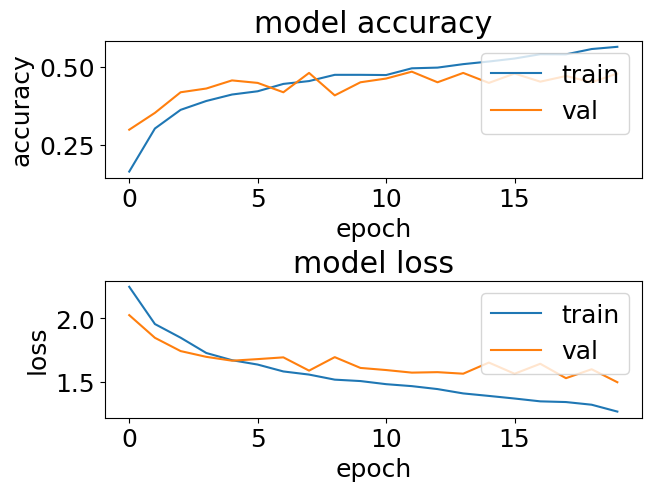

 62/157 [==========>...................] - ETA: 0s

2022-11-13 12:29:26.548960: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.61      0.65      0.63       505
           1       0.69      0.76      0.72       460
           2       0.51      0.48      0.49       519
           3       0.57      0.44      0.50       486
           4       0.52      0.55      0.53       519
           5       0.64      0.45      0.53       488
           6       0.55      0.74      0.63       518
           7       0.71      0.58      0.64       486
           8       0.70      0.70      0.70       520
           9       0.63      0.74      0.68       498

    accuracy                           0.61      4999
   macro avg       0.61      0.61      0.61      4999
weighted avg       0.61      0.61      0.61      4999

[[330  24  17   7  16   0   5  13  71  22]
 [  8 349   6   0   5   0  10   3  22  57]
 [ 43  12 249  18  78  20  51  18  17  13]
 [ 10  10  43 215  37  39  80  18   5  29]
 [ 28   5  51 

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import time
import matplotlib.pyplot as plt
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=5000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
	start = time.time()
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
	end = time.time()
	print("time spent training: ", end - start)
	model.save("cifar.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper right')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper right')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))

In [6]:
from sklearn.dummy import DummyRegressor
dummy_model = DummyRegressor().fit(x_train, y_train)

print("Dummy model: train data perf")
# Display train prediction performance
y_pred = dummy_model.predict(x_train)
y_pred_dummy = np.argmax(y_pred, axis=1)
y_pred_dummy1 = np.argmax(y_train, axis=1)
print(classification_report(y_pred_dummy1, y_pred_dummy))
print(confusion_matrix(y_pred_dummy1, y_pred_dummy))

print("Dummy model: test data perf")
# Display test prediction performance
y_pred = dummy_model.predict(x_test)
y_pred_dummy = np.argmax(y_pred, axis=1)
y_pred_dummy1 = np.argmax(y_test, axis=1)
print(classification_report(y_pred_dummy1, y_pred_dummy))
print(confusion_matrix(y_pred_dummy1, y_pred_dummy))

Dummy model: train data perf
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       505
           1       0.00      0.00      0.00       460
           2       0.00      0.00      0.00       519
           3       0.00      0.00      0.00       486
           4       0.00      0.00      0.00       519
           5       0.00      0.00      0.00       488
           6       0.00      0.00      0.00       518
           7       0.00      0.00      0.00       486
           8       0.10      1.00      0.19       520
           9       0.00      0.00      0.00       498

    accuracy                           0.10      4999
   macro avg       0.01      0.10      0.02      4999
weighted avg       0.01      0.10      0.02      4999

[[  0   0   0   0   0   0   0   0 505   0]
 [  0   0   0   0   0   0   0   0 460   0]
 [  0   0   0   0   0   0   0   0 519   0]
 [  0   0   0   0   0   0   0   0 486   0]
 [  0   0   0   0   0   0   0   0 519   

/Users/haneeshsolasa/miniforge3/envs/env_final/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haneeshsolasa/miniforge3/envs/env_final/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haneeshsolasa/miniforge3/envs/env_final/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

orig x_train shape: (9999, 32, 32, 3)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_27 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_6 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)

2022-11-13 16:29:19.277549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 2s 28ms/step - loss: 2.1145 - accuracy: 0.2315 - val_loss: 1.8805 - val_accuracy: 0.3500


2022-11-13 16:29:21.275274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch 2/20
71/71 [==============================] - 1s 19ms/step - loss: 1.8015 - accuracy: 0.3766 - val_loss: 1.7161 - val_accuracy: 0.4090
Epoch 3/20
71/71 [==============================] - 1s 19ms/step - loss: 1.6961 - accuracy: 0.4077 - val_loss: 1.6436 - val_accuracy: 0.4110
Epoch 4/20
71/71 [==============================] - 1s 19ms/step - loss: 1.5901 - accuracy: 0.4507 - val_loss: 1.5687 - val_accuracy: 0.4450
Epoch 5/20
71/71 [==============================] - 1s 19ms/step - loss: 1.5456 - accuracy: 0.4572 - val_loss: 1.5067 - val_accuracy: 0.4710
Epoch 6/20
71/71 [==============================] - 1s 19ms/step - loss: 1.4802 - accuracy: 0.4826 - val_loss: 1.5111 - val_accuracy: 0.4700
Epoch 7/20
71/71 [==============================] - 1s 19ms/step - loss: 1.4343 - accuracy: 0.5097 - val_loss: 1.4221 - val_accuracy: 0.5130
Epoch 8/20
71/71 [==============================] - 1s 18ms/step - loss: 1.4090 - accuracy: 0.5166 - val_loss: 1.3938 - val_accuracy: 0.5160
Epoch 9/20
71

INFO:tensorflow:Assets written to: cifar.model/assets


INFO:tensorflow:Assets written to: cifar.model/assets


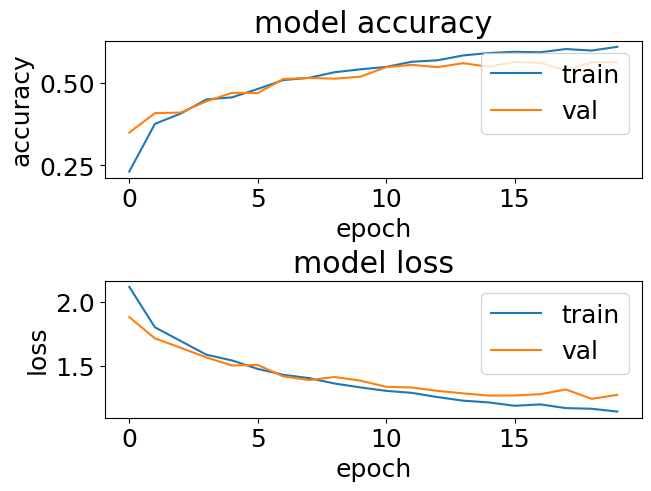

 63/313 [=====>........................] - ETA: 0s

2022-11-13 16:29:48.149013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      1005
           1       0.86      0.62      0.72       974
           2       0.48      0.66      0.56      1032
           3       0.56      0.55      0.55      1016
           4       0.68      0.44      0.53       999
           5       0.70      0.47      0.56       937
           6       0.69      0.71      0.70      1029
           7       0.71      0.72      0.71      1001
           8       0.68      0.79      0.73      1025
           9       0.61      0.83      0.70       981

    accuracy                           0.65      9999
   macro avg       0.66      0.65      0.65      9999
weighted avg       0.66      0.65      0.65      9999

[[676  15  65   9   9   2   5  14 145  65]
 [ 26 606  10   5   0   3  13   4  74 233]
 [ 67   6 684  55  41  32  53  45  34  15]
 [ 24   3 133 555  39  75  81  45  21  40]
 [ 49   2 208 

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import time
import matplotlib.pyplot as plt
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=10000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
	start = time.time()
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
	end = time.time()
	print("time spent training: ", end - start)
	model.save("cifar.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper right')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper right')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))

orig x_train shape: (19999, 32, 32, 3)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_30 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_31 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_7 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_7 (Flatten)         (None, 2048)              0         
                                                                 
 dense_7 (Dense

2022-11-13 16:32:34.435899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


141/141 [==============================] - ETA: 0s - loss: 1.9775 - accuracy: 0.2953

2022-11-13 16:32:37.538826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


141/141 [==============================] - 4s 23ms/step - loss: 1.9775 - accuracy: 0.2953 - val_loss: 1.7388 - val_accuracy: 0.3990
Epoch 2/20
141/141 [==============================] - 3s 20ms/step - loss: 1.6567 - accuracy: 0.4204 - val_loss: 1.5944 - val_accuracy: 0.4475
Epoch 3/20
141/141 [==============================] - 3s 19ms/step - loss: 1.5293 - accuracy: 0.4636 - val_loss: 1.4653 - val_accuracy: 0.5055
Epoch 4/20
141/141 [==============================] - 3s 18ms/step - loss: 1.4445 - accuracy: 0.4994 - val_loss: 1.4139 - val_accuracy: 0.5240
Epoch 5/20
141/141 [==============================] - 3s 18ms/step - loss: 1.4016 - accuracy: 0.5128 - val_loss: 1.3613 - val_accuracy: 0.5375
Epoch 6/20
141/141 [==============================] - 3s 19ms/step - loss: 1.3497 - accuracy: 0.5362 - val_loss: 1.3515 - val_accuracy: 0.5520
Epoch 7/20
141/141 [==============================] - 3s 18ms/step - loss: 1.3169 - accuracy: 0.5515 - val_loss: 1.3967 - val_accuracy: 0.5230
Epoch 8/20

INFO:tensorflow:Assets written to: cifar.model/assets


INFO:tensorflow:Assets written to: cifar.model/assets


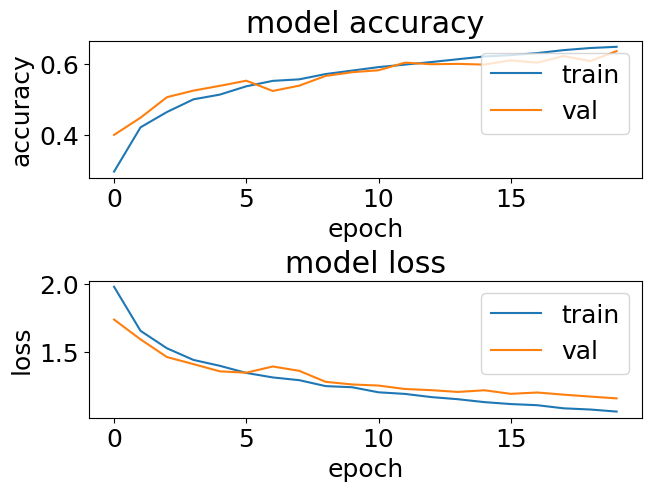

 64/625 [==>...........................] - ETA: 1s

2022-11-13 16:33:29.047447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1989
           1       0.85      0.79      0.82      1981
           2       0.58      0.61      0.60      2042
           3       0.52      0.59      0.55      2011
           4       0.62      0.61      0.61      2009
           5       0.64      0.58      0.61      1925
           6       0.75      0.76      0.76      2037
           7       0.75      0.77      0.76      2027
           8       0.83      0.76      0.80      2012
           9       0.78      0.76      0.77      1966

    accuracy                           0.70     19999
   macro avg       0.70      0.70      0.70     19999
weighted avg       0.70      0.70      0.70     19999

[[1497   27  111   64   26   15   17   27  143   62]
 [  61 1560   22   21   11   13   18   22   61  192]
 [ 111    4 1248  161  200   89  110   74   27   18]
 [  30    4  142 1187  111 

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import time
import matplotlib.pyplot as plt
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=20000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
	start = time.time()
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
	end = time.time()
	print("time spent training: ", end - start)
	model.save("cifar.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper right')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper right')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))

orig x_train shape: (39999, 32, 32, 3)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_33 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_34 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_35 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_8 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_8 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense

2022-11-13 16:34:39.135763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


282/282 [==============================] - ETA: 0s - loss: 1.8199 - accuracy: 0.3531

2022-11-13 16:34:44.725936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


282/282 [==============================] - 6s 21ms/step - loss: 1.8199 - accuracy: 0.3531 - val_loss: 1.5713 - val_accuracy: 0.4515
Epoch 2/20
282/282 [==============================] - 5s 19ms/step - loss: 1.5353 - accuracy: 0.4639 - val_loss: 1.4601 - val_accuracy: 0.4980
Epoch 3/20
282/282 [==============================] - 5s 19ms/step - loss: 1.4233 - accuracy: 0.5086 - val_loss: 1.3590 - val_accuracy: 0.5348
Epoch 4/20
282/282 [==============================] - 5s 19ms/step - loss: 1.3474 - accuracy: 0.5396 - val_loss: 1.3087 - val_accuracy: 0.5565
Epoch 5/20
282/282 [==============================] - 5s 19ms/step - loss: 1.2834 - accuracy: 0.5655 - val_loss: 1.2280 - val_accuracy: 0.5990
Epoch 6/20
282/282 [==============================] - 5s 19ms/step - loss: 1.2377 - accuracy: 0.5833 - val_loss: 1.2101 - val_accuracy: 0.5935
Epoch 7/20
282/282 [==============================] - 5s 19ms/step - loss: 1.1887 - accuracy: 0.6015 - val_loss: 1.1823 - val_accuracy: 0.6040
Epoch 8/20

INFO:tensorflow:Assets written to: cifar.model/assets


INFO:tensorflow:Assets written to: cifar.model/assets


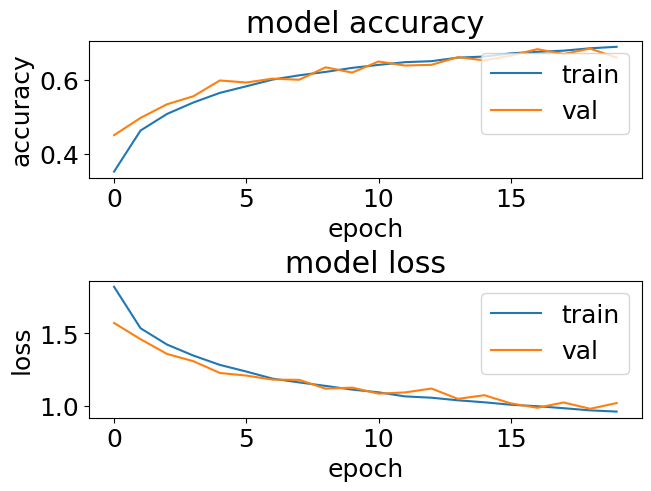

  40/1250 [..............................] - ETA: 3s

2022-11-13 16:36:26.618148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1250/1250 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      3986
           1       0.76      0.90      0.82      3986
           2       0.64      0.61      0.63      4048
           3       0.65      0.42      0.51      3984
           4       0.63      0.67      0.65      4003
           5       0.62      0.66      0.64      3975
           6       0.87      0.69      0.77      4019
           7       0.64      0.87      0.74      4023
           8       0.81      0.83      0.82      3997
           9       0.78      0.80      0.79      3978

    accuracy                           0.72     39999
   macro avg       0.72      0.72      0.71     39999
weighted avg       0.72      0.72      0.71     39999

[[2828  162  250   34   74   25   14   76  358  165]
 [  40 3591   18    8    8   11    4   16   76  214]
 [ 197   50 2484  144  373  250  106  301   79   64]
 [  61   79  250 1671  38

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import time
import matplotlib.pyplot as plt
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=40000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
	start = time.time()
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
	end = time.time()
	print("time spent training: ", end - start)
	model.save("cifar.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper right')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper right')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_65 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_66 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_67 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_16 (Dropout)        (None, 8, 8, 32)          0         
                                                                 
 flatten_16 (Flatten)        (None, 2048)              0         
                                                                 
 dense_16 (Dens

2022-11-13 17:30:12.476625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 2s 34ms/step - loss: 28484.4980 - accuracy: 0.1280 - val_loss: 7567.2803 - val_accuracy: 0.1620
Epoch 2/20


2022-11-13 17:30:13.740801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 1s 21ms/step - loss: 2492.4272 - accuracy: 0.1256 - val_loss: 647.6099 - val_accuracy: 0.0920
Epoch 3/20
36/36 [==============================] - 1s 20ms/step - loss: 377.3768 - accuracy: 0.1107 - val_loss: 273.4857 - val_accuracy: 0.0880
Epoch 4/20
36/36 [==============================] - 1s 21ms/step - loss: 260.3463 - accuracy: 0.1056 - val_loss: 257.9141 - val_accuracy: 0.0880
Epoch 5/20
36/36 [==============================] - 1s 20ms/step - loss: 254.9749 - accuracy: 0.1056 - val_loss: 255.2741 - val_accuracy: 0.0880
Epoch 6/20
36/36 [==============================] - 1s 20ms/step - loss: 254.2018 - accuracy: 0.1062 - val_loss: 250.0800 - val_accuracy: 0.0880
Epoch 7/20
36/36 [==============================] - 1s 20ms/step - loss: 253.4436 - accuracy: 0.1065 - val_loss: 254.2618 - val_accuracy: 0.0880
Epoch 8/20
36/36 [==============================] - 1s 20ms/step - loss: 253.5259 - accuracy: 0.1071 - val_loss: 256.1062 - val_accuracy: 0.

INFO:tensorflow:Assets written to: cifar.model/assets


INFO:tensorflow:Assets written to: cifar.model/assets


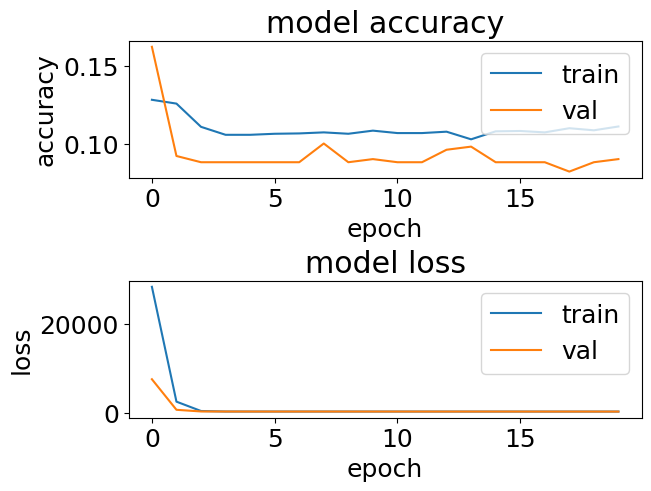

 37/157 [======>.......................] - ETA: 0s

2022-11-13 17:30:29.093201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       505
           1       0.00      0.00      0.00       460
           2       0.00      0.00      0.00       519
           3       0.00      0.00      0.00       486
           4       0.10      1.00      0.19       519
           5       0.00      0.00      0.00       488
           6       0.00      0.00      0.00       518
           7       0.00      0.00      0.00       486
           8       1.00      0.00      0.00       520
           9       0.00      0.00      0.00       498

    accuracy                           0.10      4999
   macro avg       0.11      0.10      0.02      4999
weighted avg       0.11      0.10      0.02      4999

[[  0   0   0   0 505   0   0   0   0   0]
 [  0   0   0   0 460   0   0   0   0   0]
 [  0   0   0   0 519   0   0   0   0   0]
 [  0   0   0   0 483   0   3   0   0   0]
 [  0   0   0 

/Users/haneeshsolasa/miniforge3/envs/env_final/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haneeshsolasa/miniforge3/envs/env_final/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haneeshsolasa/miniforge3/envs/env_final/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.10      1.00      0.18      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.75      0.00      0.01      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.09      0.10      0.02     10000
weighted avg       0.09      0.10      0.02     10000

[[   0    0    0    0  999    0    0    0    1    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0  998    0    2    0    0    0]
 [   0    0    0    0  998 

/Users/haneeshsolasa/miniforge3/envs/env_final/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haneeshsolasa/miniforge3/envs/env_final/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haneeshsolasa/miniforge3/envs/env_final/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import time
import matplotlib.pyplot as plt
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=5000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(100)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
	start = time.time()
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
	end = time.time()
	print("time spent training: ", end - start)
	model.save("cifar.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper right')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper right')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 32)         0         
 2D)            

2022-11-13 18:34:50.217266: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 2s 38ms/step - loss: 2.2435 - accuracy: 0.1880 - val_loss: 2.0562 - val_accuracy: 0.2400
Epoch 2/20


2022-11-13 18:34:51.601797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 1s 25ms/step - loss: 2.0271 - accuracy: 0.2747 - val_loss: 1.8741 - val_accuracy: 0.3380
Epoch 3/20
36/36 [==============================] - 1s 25ms/step - loss: 1.8248 - accuracy: 0.3610 - val_loss: 1.7256 - val_accuracy: 0.4520
Epoch 4/20
36/36 [==============================] - 1s 24ms/step - loss: 1.6930 - accuracy: 0.4052 - val_loss: 1.6610 - val_accuracy: 0.4500
Epoch 5/20
36/36 [==============================] - 1s 24ms/step - loss: 1.6550 - accuracy: 0.4214 - val_loss: 1.6414 - val_accuracy: 0.4500
Epoch 6/20
36/36 [==============================] - 1s 24ms/step - loss: 1.5665 - accuracy: 0.4570 - val_loss: 1.6638 - val_accuracy: 0.4220
Epoch 7/20
36/36 [==============================] - 1s 24ms/step - loss: 1.5203 - accuracy: 0.4739 - val_loss: 1.5790 - val_accuracy: 0.4660
Epoch 8/20
36/36 [==============================] - 1s 23ms/step - loss: 1.4916 - accuracy: 0.4806 - val_loss: 1.5683 - val_accuracy: 0.4700
Epoch 9/20
36/36 [======

INFO:tensorflow:Assets written to: cifar.model/assets


INFO:tensorflow:Assets written to: cifar.model/assets


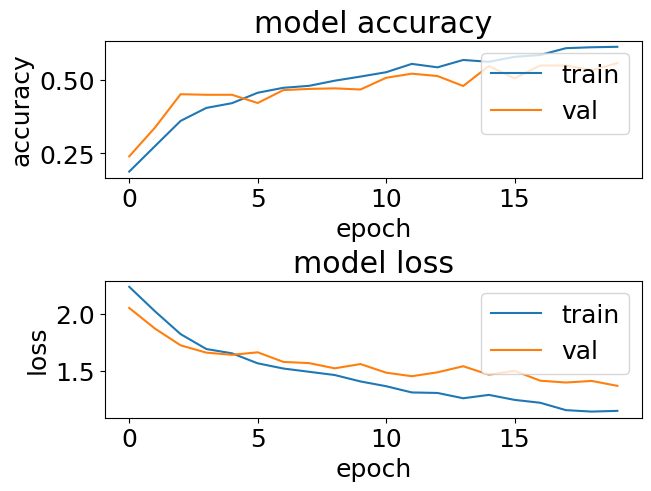

 48/157 [========>.....................] - ETA: 0s

2022-11-13 18:35:10.091849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       505
           1       0.73      0.84      0.78       460
           2       0.56      0.56      0.56       519
           3       0.59      0.56      0.58       486
           4       0.61      0.62      0.61       519
           5       0.65      0.63      0.64       488
           6       0.75      0.73      0.74       518
           7       0.76      0.70      0.73       486
           8       0.75      0.76      0.75       520
           9       0.78      0.71      0.74       498

    accuracy                           0.68      4999
   macro avg       0.68      0.68      0.68      4999
weighted avg       0.68      0.68      0.68      4999

[[362  21  28   5   7   4   3   8  58   9]
 [ 13 385   5   0   3   0   9   1  18  26]
 [ 34  11 291  34  55  31  27  20  12   4]
 [  8  10  36 273  33  57  29  17   6  17]
 [ 27   4  49 

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import time
import matplotlib.pyplot as plt
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=5000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), padding='same', activation='relu'))
	model.add(MaxPooling2D((2,2)))    
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(MaxPooling2D((2,2)))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
	start = time.time()
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
	end = time.time()
	print("time spent training: ", end - start)
	model.save("cifar.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper right')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper right')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))

orig x_train shape: (49999, 32, 32, 3)
Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 8)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 8)         584       
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 16)        1168      
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          2320      
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 32)          4640      
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 32)          9248      
                                                 

2022-11-13 19:07:45.623155: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-13 19:07:45.623281: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/40


2022-11-13 19:07:46.183447: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-13 19:07:46.543212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


352/352 [==============================] - ETA: 0s - loss: 1.8833 - accuracy: 0.3110

2022-11-13 19:07:52.758845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


352/352 [==============================] - 7s 18ms/step - loss: 1.8833 - accuracy: 0.3110 - val_loss: 1.5833 - val_accuracy: 0.4314
Epoch 2/40
352/352 [==============================] - 6s 17ms/step - loss: 1.5689 - accuracy: 0.4312 - val_loss: 1.4847 - val_accuracy: 0.4752
Epoch 3/40
352/352 [==============================] - 6s 17ms/step - loss: 1.4769 - accuracy: 0.4750 - val_loss: 1.3632 - val_accuracy: 0.5190
Epoch 4/40
352/352 [==============================] - 6s 17ms/step - loss: 1.4043 - accuracy: 0.4982 - val_loss: 1.2935 - val_accuracy: 0.5482
Epoch 5/40
352/352 [==============================] - 6s 17ms/step - loss: 1.3531 - accuracy: 0.5224 - val_loss: 1.2569 - val_accuracy: 0.5584
Epoch 6/40
352/352 [==============================] - 6s 17ms/step - loss: 1.2986 - accuracy: 0.5433 - val_loss: 1.2150 - val_accuracy: 0.5750
Epoch 7/40
352/352 [==============================] - 6s 17ms/step - loss: 1.2514 - accuracy: 0.5593 - val_loss: 1.1426 - val_accuracy: 0.6072
Epoch 8/40

INFO:tensorflow:Assets written to: cifar.model/assets


INFO:tensorflow:Assets written to: cifar.model/assets


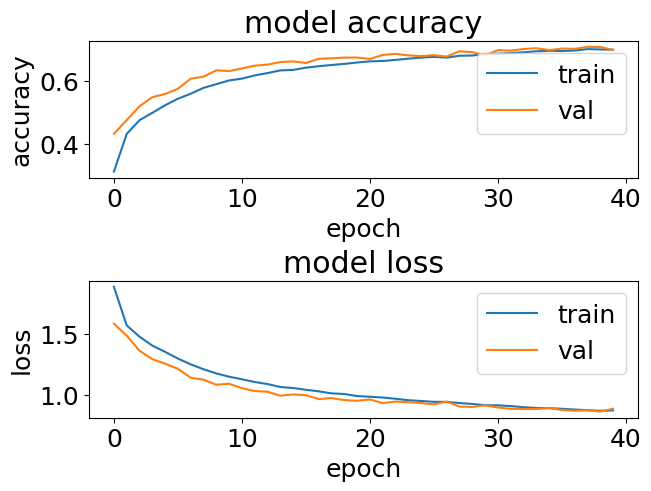

  36/1563 [..............................] - ETA: 4s

2022-11-13 19:11:53.360401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 5s 3ms/step
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      5000
           1       0.90      0.86      0.88      5000
           2       0.64      0.66      0.65      5000
           3       0.52      0.63      0.57      5000
           4       0.63      0.76      0.69      5000
           5       0.63      0.62      0.63      5000
           6       0.82      0.77      0.79      4999
           7       0.83      0.75      0.79      5000
           8       0.91      0.82      0.86      5000
           9       0.86      0.82      0.84      5000

    accuracy                           0.74     49999
   macro avg       0.76      0.74      0.75     49999
weighted avg       0.76      0.74      0.75     49999

[[3694   73  406  148  164   51   25   78  201  160]
 [  62 4311   28   54   41   26   44   28   64  342]
 [ 170    3 3286  329  563  261  230  106   33   19]
 [  39    4  329 3145  33

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import time
import matplotlib.pyplot as plt
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=50000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(8, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(8, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(16, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 40
	start = time.time()
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
	end = time.time()
	print("time spent training: ", end - start)
	model.save("cifar.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper right')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper right')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))